In [1]:
import numpy as np
import scipy.constants as ct
import matplotlib.pyplot as plt

In [2]:
meshgrid = np.zeros(500)
E = np.zeros(500)
B = np.zeros(500)

E_prev = np.zeros(500)
B_prev = np.zeros(500)

c = ct.speed_of_light

dx = 1e-3/500
dt = dx/c

In [3]:
for i in range(1,len(meshgrid)):
    E[i] = (dt*dx)*(B[i]-B[i-1]) + E_prev[i]
    E_prev[i] = E[i] #for update time boundary condition

for j in range(len(meshgrid)-1):
    B[j+1] = (dt*dx)*(B[j+1]-B[j]) + E[j]
    B_prev[j] = B[j] #for update time boundary condition

In [4]:
def Source_Function(t):
    lambda_0 = 550e-9
    w0 = 2*np.pi*c0/lambda_0
    tau = 30
    t0 = tau*3
    
    return np.exp(-(t-t0)**2/tau**2)*np.sin(w0*t*dt)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as ct

eps0 = ct.epsilon_0
mu0 = ct.mu_0
c0 = ct.speed_of_light
imp0 = np.sqrt(mu0/eps0)

jmax = 500
jsource = 2
nmax = 3000

Ex = np.zeros(jmax)
Hz = np.zeros(jmax)
Ex_prev = np.zeros(jmax)
Hz_prev = np.zeros(jmax)

lambda_min = 550e-9
dx = lambda_min/20
dt = dx / c0

eps=np.full(500,eps0)

unit = ct.kgf
conduct = 1.55*unit

eps[200:205]=3.6
#eps[220:239]=8.6
#eps[240:259]=3.6
#eps[260:279]=8.6
eps[74:80]= np.sqrt(np.sqrt(eps0**2 + 16*np.pi**2*conduct**2))*eps0

print(np.sqrt(np.sqrt(eps0**2 + 16*np.pi**2*conduct**2))*eps0)

1.2237137749322784e-10


In [6]:
def permit(conductivity):
    eps0 = ct.epsilon_0
    unit = conductivity*ct.kgf

    return np.sqrt(np.sqrt(eps0**2 + 16*np.pi**2*unit**2))*eps0

In [7]:
permit(1.55)

1.2237137749322784e-10

In [8]:
f = lambda x: 0.1*x**5-0.2*x**3 + 0.1*x -0.2

In [9]:
x = 0.1
h = 0.1

df1 = 0.09405
df2 = -0.118

diff1 = (f(x+h)-f(x))/h
diff2 = (f(x+2*h)-2*f(x+h) + f(x))/h**2

print("%f\t %f\t %f\t %f" % (diff1, diff1 - df1,diff2, diff2-df2))

0.086310	 -0.007740	 -0.222000	 -0.104000


In [10]:
%matplotlib inline

In [11]:
n = 10
h = (5-0)/n

A = np.zeros((n+1,n+1))
A[0,0] = 1
A[n,n] = 1

for i in range(1,n):
    A[i,i-1] = 1
    A[i , i] = -2
    A[i , i+1] = 1

print(A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [12]:
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


In [13]:
y = np.linalg.solve(A,b)
y

array([ 0.   , 16.025, 29.6  , 40.725, 49.4  , 55.625, 59.4  , 60.725,
       59.6  , 56.025, 50.   ])

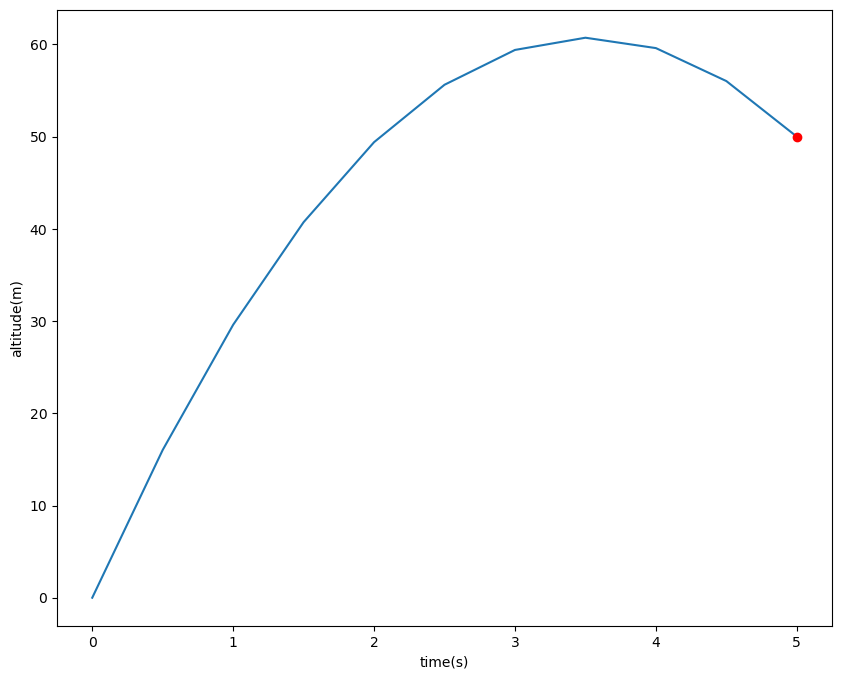

In [14]:
t=np.linspace(0,5,11)

plt.figure(figsize=(10,8))
plt.plot(t,y)
plt.plot(5,50,'ro')
plt.xlabel('time(s)')
plt.ylabel('altitude(m)')
plt.show()

In [15]:
y_n1 = -9.8*h**2 + 2*y[0] -y[1]

(y[1] - y_n1)/(2*h)

34.5

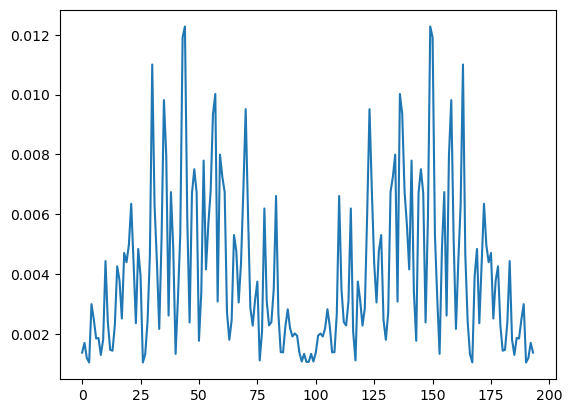

In [16]:
array = [0.00137213, 0.00169687, 0.00119211, 0.00104168, 0.0029928 ,
        0.00247675, 0.00184276, 0.00186229, 0.00129526, 0.00180773,
        0.00443303, 0.00238777, 0.00146412, 0.00143457, 0.00229274,
        0.00425652, 0.0037831 , 0.00251019, 0.00470327, 0.00439227,
        0.00497154, 0.0063496 , 0.00439958, 0.00235421, 0.00483729,
        0.00393799, 0.00104501, 0.00132122, 0.00242898, 0.00464641,
        0.01100574, 0.00628542, 0.00440889, 0.00216396, 0.00519568,
        0.00981485, 0.0079608 , 0.00261002, 0.00673896, 0.00484558,
        0.00132809, 0.00317639, 0.00530858, 0.01191112, 0.01227691,
        0.00583243, 0.00238056, 0.00669509, 0.00750436, 0.0067248 ,
        0.00176626, 0.00338634, 0.00779347, 0.00415383, 0.00565098,
        0.00676187, 0.00935157, 0.01001974, 0.00307908, 0.00799344,
        0.00725298, 0.0067394 , 0.00271255, 0.00179979, 0.00246135,
        0.00530239, 0.00475961, 0.00304775, 0.00436681, 0.0067991 ,
        0.00951265, 0.00601259, 0.00286832, 0.00227501, 0.00312039,
        0.00374843, 0.00111174, 0.00207669, 0.00619195, 0.00309905,
        0.00228059, 0.00239001, 0.00348588, 0.00660836, 0.00267389,
        0.00138811, 0.00137993, 0.00225289, 0.0028209 , 0.00218393,
        0.0019114 , 0.00201147, 0.00193926, 0.00136766, 0.00107451,
        0.00132982, 0.00106145, 0.00106145, 0.00132982, 0.00107451,
        0.00136766, 0.00193926, 0.00201147, 0.0019114 , 0.00218393,
        0.0028209 , 0.00225289, 0.00137993, 0.00138811, 0.00267389,
        0.00660836, 0.00348588, 0.00239001, 0.00228059, 0.00309905,
        0.00619195, 0.00207669, 0.00111174, 0.00374843, 0.00312039,
        0.00227501, 0.00286832, 0.00601259, 0.00951265, 0.0067991 ,
        0.00436681, 0.00304775, 0.00475961, 0.00530239, 0.00246135,
        0.00179979, 0.00271255, 0.0067394 , 0.00725298, 0.00799344,
        0.00307908, 0.01001974, 0.00935157, 0.00676187, 0.00565098,
        0.00415383, 0.00779347, 0.00338634, 0.00176626, 0.0067248 ,
        0.00750436, 0.00669509, 0.00238056, 0.00583243, 0.01227691,
        0.01191112, 0.00530858, 0.00317639, 0.00132809, 0.00484558,
        0.00673896, 0.00261002, 0.0079608 , 0.00981485, 0.00519568,
        0.00216396, 0.00440889, 0.00628542, 0.01100574, 0.00464641,
        0.00242898, 0.00132122, 0.00104501, 0.00393799, 0.00483729,
        0.00235421, 0.00439958, 0.0063496 , 0.00497154, 0.00439227,
        0.00470327, 0.00251019, 0.0037831 , 0.00425652, 0.00229274,
        0.00143457, 0.00146412, 0.00238777, 0.00443303, 0.00180773,
        0.00129526, 0.00186229, 0.00184276, 0.00247675, 0.0029928 ,
        0.00104168, 0.00119211, 0.00169687, 0.00137213]
arr = []

for i in range(len(array)-2):
    if (array[i+1]-array[i])/2 > 0 and (array[i+2]-array[i+1])/2 < 0 :
        arr.append(array[i+1])
    else:
        arr.append(0)
plt.plot(array)
plt.show()

In [17]:
x = np.linspace(0.6e-5,1.6e-5,95)
y = arr [97:196]

z = (x,y)

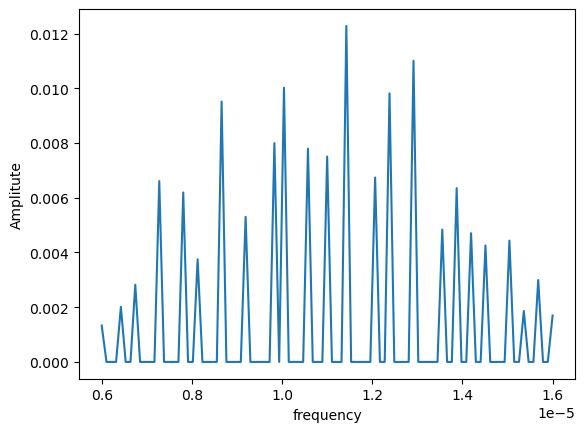

In [18]:
plt.plot(x,y)
plt.xlabel("frequency")
plt.ylabel("Amplitute")
plt.show()

In [19]:
np.savetxt('z.csv',z,delimiter=",")

In [20]:
freq_arr=(2*np.pi/c)*np.array([0.000006
,6.42553E-06
,6.74468E-06
,7.2766E-06
,7.80851E-06
,8.12766E-06
,8.65957E-06
,9.19149E-06
,9.82979E-06
,1.00426E-05
,1.05745E-05
,1.1E-05
,1.14255E-05
,1.20638E-05
,1.2383E-05
,1.29149E-05
,1.35532E-05
,1.38723E-05
,1.41915E-05
,1.45106E-05
,1.50426E-05
,1.53617E-05
,1.56809E-05
,1.6E-05
])

freq_y = np.arange(24)

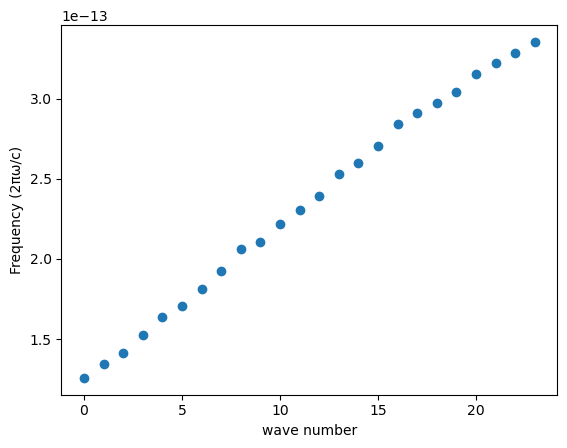

In [21]:
plt.scatter(freq_y,freq_arr)
plt.xlabel("wave number")
plt.ylabel("Frequency (2πω/c)")
plt.show()